In [92]:
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.cluster import AffinityPropagation
from mpl_toolkits.mplot3d import Axes3D 

In [93]:
# define dataset
#X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

url = 'E:/temp_ml_data/sample_4_clients.csv'
data = pd.read_csv(url, delimiter=',')
del data['avgQty']
data[:3]

,clientId,month,modeProd
0,1,12,85123
1,1,12,85123
2,1,1,22803


In [94]:
entradas = data.iloc[:,0:3]
X = np.array(entradas)
X[:3]

array([[    1,    12, 85123],
       [    1,    12, 85123],
       [    1,     1, 22803]], dtype=int64)

In [95]:
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
print(clusters)

[0 1 2]


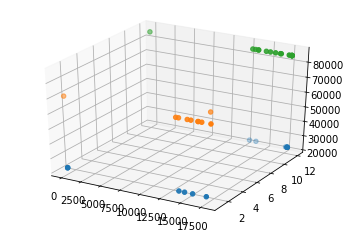

In [99]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	ax.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 2])
# show the plot
#pyplot.xlim(0, 17200)
#pyplot.ylim(0, 12)
pyplot.show()